In [20]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import datetime
import logging

# Set logging level to ERROR
logging.getLogger('tensorflow').setLevel(logging.INFO)

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [21]:
(ds_train, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,)

In [22]:
ds_info

tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_dir='/home/martin/tensorflow_datasets/cifar10/3.0.2',
    file_format=tfrecord,
    download_size=162.17 MiB,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(32, 32, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=50000, num_shards=1>,
    },
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = 

FeaturesDict({
    'id': Text(shape=(), dtype=string),
    'image': Image(shape=(32, 32, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})


2023-12-11 16:02:27.226820: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]
2023-12-11 16:02:27.227706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]
2023-12-11 16:02:27.304789: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline si

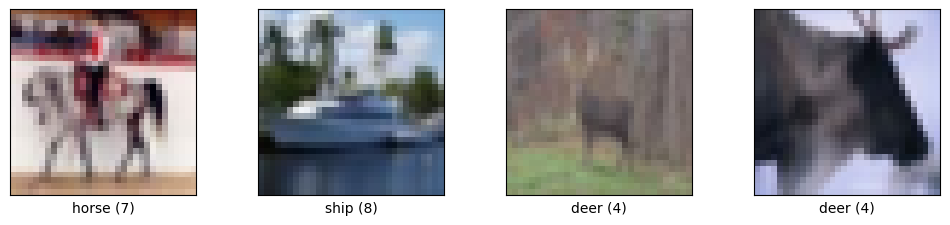

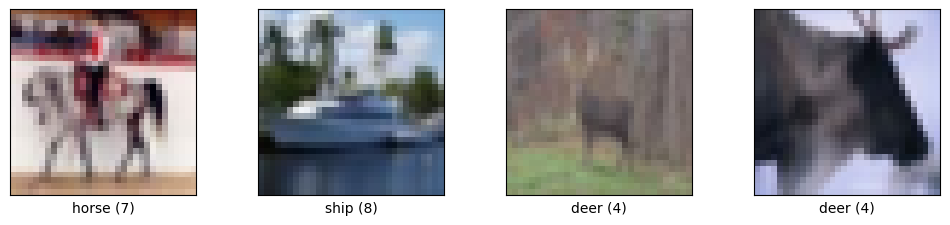

In [23]:
print(ds_info.features)
tfds.show_examples(ds_train, ds_info, rows=1, cols=4)

In [24]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 256., label

def prep_cifar10(cifar, batch_size=32):
    cifar = cifar.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    cifar = cifar.map(lambda img, label: (img, tf.one_hot(label, 10)), num_parallel_calls=tf.data.experimental.AUTOTUNE)
    cifar = cifar.cache()
    cifar = cifar.shuffle(1024)
    cifar = cifar.batch(batch_size)
    cifar = cifar.prefetch(tf.data.experimental.AUTOTUNE)

    return cifar

In [25]:
img,label = normalize_img(ds_train.take(1).__iter__().__next__()[0], ds_train.take(1).__iter__().__next__()[1])
print(img.numpy().min(), img.numpy().max(), img.numpy().shape, label.numpy())   

0.0 0.97265625 (32, 32, 3) 7


2023-12-11 16:02:27.720176: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [1]
	 [[{{node Placeholder/_2}}]]
2023-12-11 16:02:27.720770: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [1]
	 [[{{node Placeholder/_1}}]]
2023-12-11 16:02:27.816813: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline 

In [26]:
ds_1 = ds_train.apply(lambda ds: prep_cifar10(ds, batch_size=100))

img,label = ds_1.take(1).__iter__().__next__()[0], ds_1.take(1).__iter__().__next__()[1]
print(img.numpy().min(), img.numpy().max(), img.numpy().shape, label.numpy()[0])

2023-12-11 16:02:27.997925: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]
2023-12-11 16:02:27.998438: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [1]
	 [[{{node Placeholder/_1}}]]


0.0 0.99609375 (100, 32, 32, 3) [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


2023-12-11 16:02:28.207193: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2023-12-11 16:02:28.207902: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2023-12-11 16:02:28.220352: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indic

In [27]:
# layers
class ResidualCNNLayer(tf.keras.layers.Layer):
  def __init__(self, num_filters, **kwargs):
    super().__init__()

    self.conv_1 = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=kwargs.get('kernel_size', (3,3)),
                                          strides=kwargs.get('strides',(1,1)), padding='same', use_bias=False)
    self.batch_norm_1 = tf.keras.layers.BatchNormalization()
    self.conv_2 = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=kwargs.get('kernel_size', (3,3)),
                                          strides=kwargs.get('strides',(1,1)), padding='same', use_bias=False)
    self.batch_norm_2 = tf.keras.layers.BatchNormalization()
    self.conv_3 = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=kwargs.get('kernel_size', (3,3)),
                                          strides=kwargs.get('strides',(1,1)), padding='same', use_bias=False)
    self.batch_norm_3 = tf.keras.layers.BatchNormalization()

    self.activation = kwargs.get('activation', tf.keras.activations.relu)
    # self.conv_1 = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=kwargs.get('kernel_size', (3,3)),
    #                                     strides=kwargs.get('strides',(1,1)), padding='same', activation=kwargs.get('activation', 'relu'))
    # self.conv_2 = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=kwargs.get('kernel_size', (3,3)),
    #                                     strides=kwargs.get('strides',(1,1)), padding='same', activation=kwargs.get('activation', 'relu'))
    # self.conv_3 = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=kwargs.get('kernel_size', (3,3)),
    #                                     strides=kwargs.get('strides',(1,1)), padding='same', activation=kwargs.get('activation', 'relu'))
    # self.batch_norm_1 = tf.keras.layers.BatchNormalization()

  def call(self, x, training=False):
    out = self.conv_1(x)
    out = self.batch_norm_1(out, training=training)
    out = self.activation(out)

    out = self.conv_2(out)
    out = self.batch_norm_2(out, training=training)
    out = self.activation(out)

    out = self.conv_3(out)
    out = self.batch_norm_3(out, training=training)
    out = self.activation(out)

    out = out + x
    return out
    

class ResidualCNNBlock(tf.keras.layers.Layer):
  def __init__(self, num_filters, layers, **kwargs):
    super().__init__()
    self.deeper_layer = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=kwargs.get('kernel_size', (3,3)),
                                               strides=kwargs.get('strides',(1,1)), padding='same', activation=kwargs.get('activation', 'relu'))
    self.layers = [ResidualCNNLayer(num_filters, **kwargs) for _ in range(layers)]
    self.batch_norm_1 = tf.keras.layers.BatchNormalization()

  def call(self, x):
    x = self.deeper_layer(x)
    out = self.layers[0](x)
    for layer in self.layers[1:]:
      out = layer(out)
    out = self.batch_norm_1(out)
    out = out + x
    return out

In [28]:
## models
# ---------------------------------------- ResNet model ----------------------------------------
class ResNet(tf.keras.Model):
    def __init__(self, loss_fn=None, optimizer=None, from_logits=True,name='ResNet'):
        super().__init__(name=name)

        # use CategoricalCrossentropy loss from logits (no softmax in output layer) for numerical stability/more accurate gradients ?
        # from_logits = True
        output_activation = None if from_logits else 'softmax'

        if optimizer is None:
            self.optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
        else:
            self.optimizer = optimizer

        if loss_fn is None:
            self.loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=from_logits)
        else:
            self.loss_fn = loss_fn
        
        self.metric = {
                    'loss': tf.keras.metrics.Mean(name='loss'),
                    'accuracy': tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
                    'top_2_accuracy': tf.keras.metrics.TopKCategoricalAccuracy(k=2, name='top_2_categorical_accuracy')
                    }
        

        self.resBlock01 = ResidualCNNBlock(32,4, name='resBlock01')
        self.pooling1 = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, name='pooling1')

        self.resBlock02 = ResidualCNNBlock(64,4,name='resBlock02')
        self.pooling2 = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, name='pooling2')

        self.resBlock03 = ResidualCNNBlock(128,4, name='resBlock03')
        self.globalpooling = tf.keras.layers.GlobalAvgPool2D(name='globalpooling')

        self.output_layer = tf.keras.layers.Dense(10, activation=output_activation, name='output_layer')

        self.layers_list = [self.resBlock01, self.pooling1, self.resBlock02, self.pooling2, self.resBlock03, self.globalpooling, self.output_layer]

        
    @tf.function
    def call(self, x, training=False):
        for layer in self.layers_list:
            x = layer(x, training=training)
        return x

    @tf.function
    def train_step(self, data):
        inputs, targets = data

        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.loss_fn(targets, predictions)

        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))

        self.metric['loss'].update_state(loss)
        self.metric['accuracy'].update_state(targets, predictions)
        self.metric['top_2_accuracy'].update_state(targets, predictions)

        return {m.name: m.result() for m in self.metric.values()}

    @tf.function
    def test_step(self, data):
        inputs, targets = data

        predictions = self(inputs, training=False)
        loss = self.loss_fn(targets, predictions)

        self.metric['loss'].update_state(loss)
        self.metric['accuracy'].update_state(targets, predictions)
        self.metric['top_2_accuracy'].update_state(targets, predictions)

        return {m.name: m.result() for m in self.metric.values()}

    @tf.function
    def reset_metrics(self):
        for metric in self.metrics:
            metric.reset_states()

    def summary_workaround(self, **kwargs):
        # not the best workaround for printing the architecture specification for sub-classed models
        model = tf.keras.Sequential(self.layers_list, name=self.__class__.__name__)
        model.build(input_shape=(None, 32, 32, 3))
        return model.summary(**kwargs)


# ---------------------------------------- Basic CNN model ----------------------------------------
class BasicCNN(tf.keras.Model):
    def __init__(self, loss_fn=None, optimizer=None, from_logits=True,name='BasicCNN'):
        pass

        super().__init__(name=name)

        # use CategoricalCrossentropy loss from logits (no softmax in output layer) for numerical stability/more accurate gradients ?
        # from_logits = True
        output_activation = None if from_logits else 'softmax'

        if optimizer is None:
            self.optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
        else:
            self.optimizer = optimizer

        if loss_fn is None:
            self.loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=from_logits)
        else:
            self.loss_fn = loss_fn
        
        self.metric = {
                    'loss': tf.keras.metrics.Mean(name='loss'),
                    'accuracy': tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
                    'top_2_accuracy': tf.keras.metrics.TopKCategoricalAccuracy(k=2, name='top_2_categorical_accuracy')
                    }
        

        self.conv1 = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', name='conv1')
        self.conv2 = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', name='conv2')
        self.poll1 = tf.keras.layers.MaxPool2D(name='max_pooling2d_1')
        self.conv3 = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu', name='conv3')
        self.conv4 = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu', name='conv4')
        self.poll2 = tf.keras.layers.MaxPool2D(name='max_pooling2d_2')
        self.conv5 = tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu', name='conv5')
        self.conv6 = tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu', name='conv6')
        self.poll3 = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling')
        self.output_layer = tf.keras.layers.Dense(10, activation=output_activation, name='output_layer')

        self.layers_list = [self.conv2, self.poll1, self.conv3, self.conv4, self.poll2, self.conv5, self.conv6, self.poll3, self.output_layer]

        
    @tf.function
    def call(self, x, training=False):
        for layer in self.layers_list:
            x = layer(x, training=training)
        return x

    @tf.function
    def train_step(self, data):
        inputs, targets = data

        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.loss_fn(targets, predictions)

        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))

        self.metric['loss'].update_state(loss)
        self.metric['accuracy'].update_state(targets, predictions)
        self.metric['top_2_accuracy'].update_state(targets, predictions)

        return {m.name: m.result() for m in self.metric.values()}

    @tf.function
    def test_step(self, data):
        inputs, targets = data

        predictions = self(inputs, training=False)
        loss = self.loss_fn(targets, predictions)

        self.metric['loss'].update_state(loss)
        self.metric['accuracy'].update_state(targets, predictions)
        self.metric['top_2_accuracy'].update_state(targets, predictions)

        return {m.name: m.result() for m in self.metric.values()}

    @tf.function
    def reset_metrics(self):
        for metric in self.metrics:
            metric.reset_states()

    def summary_workaround(self, **kwargs):
        # not the best workaround for printing the architecture specification for sub-classed models
        model = tf.keras.Sequential(self.layers_list, name=self.__class__.__name__)
        model.build(input_shape=(None, 32, 32, 3))
        return model.summary(**kwargs)


In [29]:
# test the model
model = ResNet() # None for batch size
# model.build(input_shape=(None, 32, 32, 3))
# model.summary()
model.summary_workaround()

dummy_input = tf.random.normal((2, 32, 32, 3))
pred = model(dummy_input)
print("sample output shape: ",pred.shape)
print("predicted clases: ", tf.nn.softmax(pred).numpy().argmax(axis=-1))

Model: "ResNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 residual_cnn_block_6 (Resid  (None, 32, 32, 32)       113152    
 ualCNNBlock)                                                    
                                                                 
 pooling1 (MaxPooling2D)     (None, 16, 16, 32)        0         
                                                                 
 residual_cnn_block_7 (Resid  (None, 16, 16, 64)       464192    
 ualCNNBlock)                                                    
                                                                 
 pooling2 (MaxPooling2D)     (None, 8, 8, 64)          0         
                                                                 
 residual_cnn_block_8 (Resid  (None, 8, 8, 128)        1849984   
 ualCNNBlock)                                                    
                                                            

In [30]:
import pandas as pd
from pandas import DataFrame
import tqdm

def training_loop(model, train_ds, test_ds, epochs, train_summary_writer, val_summary_writer):

    df = DataFrame(columns=['epoch', 'train_loss', 'train_accuracy', 'train_top_2_categorical_accuracy', 'test_loss', 'test_accuracy', 'test_top_2_categorical_accuracy'])

    for epoch in range(epochs):
        epoch = epoch + 1
        epoch_metrics = {'epoch': epoch}
        print(f"Epoch {epoch}:")
        # Training:
        for data in tqdm.tqdm(train_ds, position=0, leave=True, desc=f"Training::Epoch {epoch}"):
            metrics = model.train_step(data)
            
            # logging the validation metrics to the log file which is used by tensorboard
            with train_summary_writer.as_default():
                for metric in model.metrics:
                    tf.summary.scalar(f"{metric.name}", metric.result(), step=epoch)

        epoch_metrics.update({f"train_{key}": value.numpy() for (key, value) in metrics.items()})
        # print the metrics
        print([f"{key}: {value.numpy()}" for (key, value) in metrics.items()])

        # reset all metrics (requires a reset_metrics method in the model)
        model.reset_metrics()    
        
        # Validation:
        for data in tqdm.tqdm(test_ds, position=0, leave=True, desc=f"Testing::Epoch {epoch}"):
            metrics = model.test_step(data)
        
            # logging the validation metrics to the log file which is used by tensorboard
            with val_summary_writer.as_default():
                for metric in model.metrics:
                    tf.summary.scalar(f"{metric.name}", metric.result(), step=epoch)

        epoch_metrics.update({f"test_{key}": value.numpy() for (key, value) in metrics.items()})
        print([f"test_{key}: {value.numpy()}" for (key, value) in metrics.items()])

        # reset all metrics
        model.reset_metrics()
        
        # df = df.append(epoch_metrics, ignore_index=True)
        epoch_df = pd.DataFrame([epoch_metrics])
        df = pd.concat([df, epoch_df], ignore_index=True)
        
        print(f"{'-'*80}\n")
        print(f"{'-'*80}\n")

    return df

In [31]:
import json
import os

def save_config(config_dict, metrics_df, path='model_configs/', filename = 'conig.json'):
    config_dict['record'] = metrics_df.to_dict(orient='list')
    config_dict['result'] = metrics_df.tail(1).to_dict('records')[0]
    if not os.path.exists(path):
        os.makedirs(path)
        
    with open(path+filename, 'w') as f:
        json.dump(config_dict, f)

In [32]:
# hyperparameters
CONFIG_NAME = "ResNet"
# CONFIG_NAME = 'BasicCNN'
ID = 15
WITH_TIME_STAMP = True

EPOCHS = 15
BATCH_SIZE = 64
LEARNING_RATE = 0.001
MOMENTUM = 0.9

LOSS_FN = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
LOSS_FN_NAME = LOSS_FN.__class__.__name__

# OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE,)
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
OPTIMIZER_NAME = OPTIMIZER.__class__.__name__

config_dict = {
    'meta_data':{
        'CONFIG_NAME': CONFIG_NAME,
        'ID': ID,
        'WITH_TIME_STAMP': WITH_TIME_STAMP,
        },
    'hyperparameters':{
        'EPOCHS': EPOCHS,
        'BATCH_SIZE': BATCH_SIZE,
        'LEARNING_RATE': LEARNING_RATE,
        'MOMENTUM': MOMENTUM,
        'LOSS_FN_NAME': LOSS_FN_NAME,
        'OPTIMIZER_NAME': OPTIMIZER_NAME
        },
    'record': {}
}

In [33]:
if CONFIG_NAME == 'ResNet':
    model = ResNet(optimizer=OPTIMIZER, loss_fn=LOSS_FN)
else:
    model = BasicCNN(optimizer=OPTIMIZER, loss_fn=LOSS_FN)

train_dataset = ds_train.apply(lambda ds: prep_cifar10(ds, batch_size=BATCH_SIZE))
test_dataset = ds_train.apply(lambda ds: prep_cifar10(ds, batch_size=BATCH_SIZE))


In [ ]:
if WITH_TIME_STAMP:
    CURRENT_TIME = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
else:
    CURRENT_TIME = ""

train_log_path = f"logs/{CONFIG_NAME}/id_{ID}_{CURRENT_TIME}/train"
val_log_path = f"logs/{CONFIG_NAME}/id_{ID}_{CURRENT_TIME}/test"

# log writer for training metrics
train_summary_writer = tf.summary.create_file_writer(train_log_path)

# log writer for validation metrics
val_summary_writer = tf.summary.create_file_writer(val_log_path)

metrics_df = training_loop(model, train_dataset, test_dataset, EPOCHS, train_summary_writer, val_summary_writer)

save_config(config_dict, metrics_df, path='model_configs/', filename = f"{CONFIG_NAME}_id_{ID}_{CURRENT_TIME}.json")

In [34]:
%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 236454), started 2:05:09 ago. (Use '!kill 236454' to kill it.)

: 